### This notebook provides a simple implementation of the image captioning model in the PTIR framework, demonstrating how to use pretrained models, evaluate performance, and set up basic training.

### Resources:
- ![GitHub](https://badgen.net/badge/icon/github?icon=github&label) [PTIR Demo](https://rasoulasadiyan.github.io/PTIR)

- ![HuggingFace](https://img.shields.io/badge/%F0%9F%A4%97%20HuggingFace-Dataset-blue) [COCO-PIC validation dataset](https://huggingface.co/datasets/rasoulub/coco-pic)

- ![GitHub](https://badgen.net/badge/icon/github?icon=github&label) [PIC implementation from scratch in Tensorflow ](https://github.com/rasoulasadiyan/Persian-Image-Captioning-PIC)



## IEEE Paper Reference

###Publication Reference

This work has been published in [IEEE [CSICC/2025]](https://ieeexplore.ieee.org/document/10967407):

**Title**: "Persian Text-Image Retrieval: A Framework Based
on Image Captioning and Scalable Vector Search"  
**Authors**: Rasoul Asadian, Alireza Akhavanpour

**DOI**: https://doi.org/10.1109/CSICC65765.2025.10967407



### 1. Overview of PTIR Framework

PTIR is a comprehensive framework designed specifically for Persian multimodal tasks, addressing the challenges of text-image retrieval in Persian language contexts.


![PTIR Framework](https://raw.githubusercontent.com/rasoulasadiyan/PTIR/demo/docs/assets/PTIR.png)

**Key Components:**
1. Persian Image Captioning Model
2. Text Embedding Models  
3. Vector Database (Milvus)



---

---

In [1]:
!pip install -qq datasets arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [17]:
# !pip uninstall hazm
# !pip install --upgrade numpy transformers

In [1]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import VisionEncoderDecoderModel, AutoTokenizer, AutoImageProcessor
import matplotlib.pyplot as plt
from PIL import Image
import json
import os
import arabic_reshaper
from bidi.algorithm import get_display


# Loading dataset

In [3]:
from datasets import load_dataset
dataset = load_dataset("rasoulasadianub/coco-pic")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.84k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/39 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/39 [00:00<?, ?it/s]

train-00000-of-00039.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00001-of-00039.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

train-00002-of-00039.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00003-of-00039.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00004-of-00039.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00005-of-00039.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

train-00006-of-00039.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

train-00007-of-00039.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00008-of-00039.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00009-of-00039.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00010-of-00039.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

train-00011-of-00039.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00012-of-00039.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

train-00013-of-00039.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00014-of-00039.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00015-of-00039.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

train-00016-of-00039.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00017-of-00039.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

train-00018-of-00039.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00019-of-00039.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00020-of-00039.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

train-00021-of-00039.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00022-of-00039.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00023-of-00039.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00024-of-00039.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00025-of-00039.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00026-of-00039.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00027-of-00039.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

train-00028-of-00039.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00029-of-00039.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

train-00030-of-00039.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00031-of-00039.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00032-of-00039.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00033-of-00039.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00034-of-00039.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

train-00035-of-00039.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00036-of-00039.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00037-of-00039.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00038-of-00039.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/117266 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects', 'caption'],
        num_rows: 117266
    })
})

In [5]:
def preprocess_image(processor, image):
  image = image.convert('RGB')
  pixel_values = processor(image, return_tensors="pt").pixel_values
  return pixel_values

def generate_caption(model, tokenizer, processor, image):
  with torch.no_grad():
    pixel_values = preprocess_image(processor, image)
    pixel_values = pixel_values.to(model.device)
    output_ids = model.generate(pixel_values)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption

def visualize_caption(inp, caption):
  if isinstance(inp, str):
    inp = Image.open(inp).convert('RGB')

  reshaped_caption = arabic_reshaper.reshape(caption)
  bidi_text = get_display(reshaped_caption)
  plt.figure(figsize=(5, 8))
  plt.imshow(inp)
  plt.axis("off")
  plt.title(bidi_text)
  plt.show()

## Explore COCO Dataset

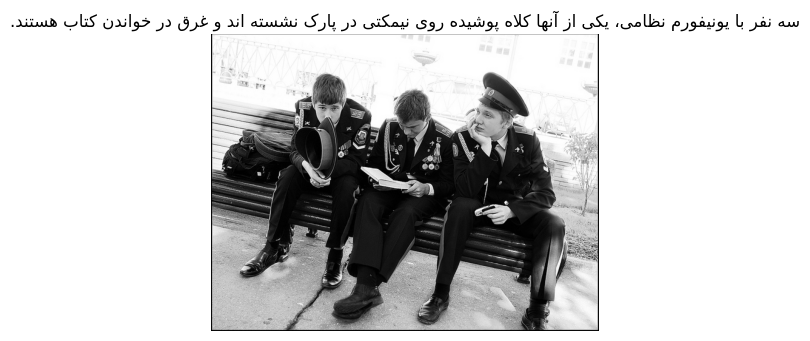

In [6]:
idx = 55
visualize_caption(dataset['train'][idx]['image'], dataset['train'][idx]['caption'])

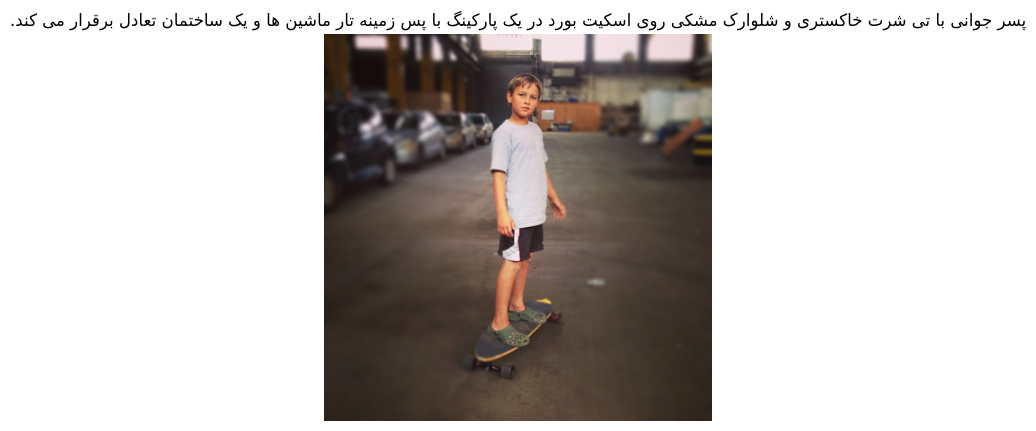

In [7]:
idx = 8000
visualize_caption(dataset['train'][idx]['image'], dataset['train'][idx]['caption'])

# Loading trained model

## Model Architecture

PTIR’s captioning model uses DINOv2-base as a vision encoder and GPT2-fa as a Persian-specific text decoder.

In [4]:
model_name = "shenasa/persian-image-captioning"
caption_model = VisionEncoderDecoderModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token_id = tokenizer.eos_token_id
image_processor = AutoImageProcessor.from_pretrained(model_name)

Config of the encoder: <class 'transformers.models.dinov2.modeling_dinov2.Dinov2Model'> is overwritten by shared encoder config: Dinov2Config {
  "apply_layernorm": true,
  "architectures": [
    "Dinov2Model"
  ],
  "attention_probs_dropout_prob": 0.0,
  "drop_path_rate": 0.0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 518,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "layerscale_value": 1.0,
  "mlp_ratio": 4,
  "model_type": "dinov2",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "out_features": [
    "stage12"
  ],
  "out_indices": [
    12
  ],
  "patch_size": 14,
  "qkv_bias": true,
  "reshape_hidden_states": true,
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4",
    "stage5",
    "stage6",
    "stage7",
    "stage8",
    "stage9",
    "stage10",
    "stage11",
    "stage12"
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "use_

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
caption_model.to(device)

VisionEncoderDecoderModel(
  (encoder): Dinov2Model(
    (embeddings): Dinov2Embeddings(
      (patch_embeddings): Dinov2PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Dinov2Encoder(
      (layer): ModuleList(
        (0-11): 12 x Dinov2Layer(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attention): Dinov2Attention(
            (attention): Dinov2SelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): Dinov2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (layer_scale1): Dinov2LayerS

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


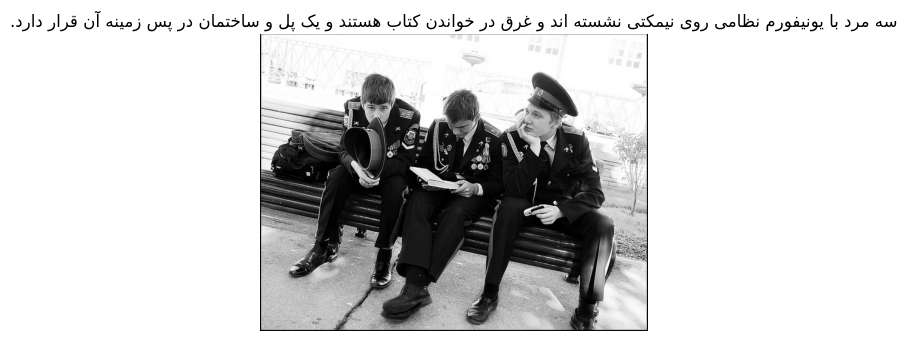

In [10]:
idx = 55
image = dataset['train'][idx]['image']
generated_caption = generate_caption(caption_model, tokenizer, image_processor, image)
visualize_caption(image, generated_caption)

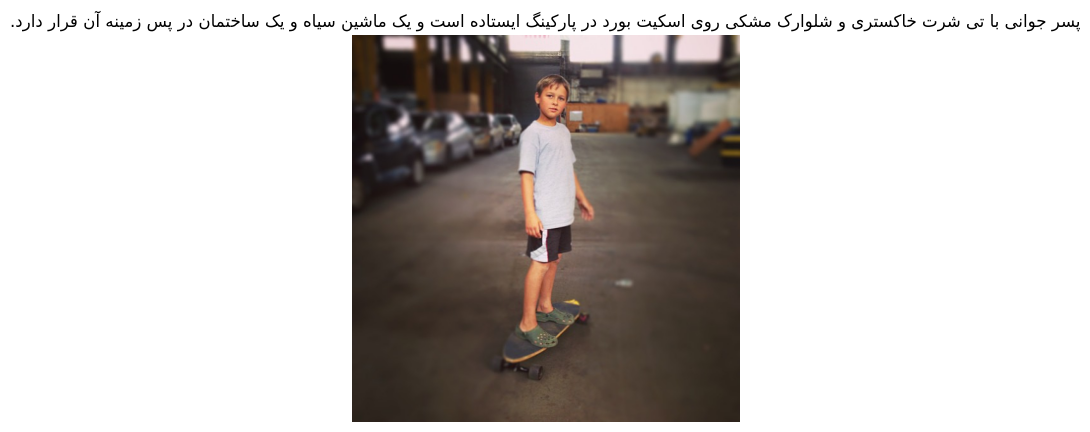

In [11]:
idx = 8000
image = dataset['train'][idx]['image']
generated_caption = generate_caption(caption_model, tokenizer, image_processor, image)
visualize_caption(image, generated_caption)

In [12]:
# model architectures
print('PIC model: ', caption_model.config.architectures)
print('Encoder model: ', caption_model.encoder.config.architectures)
print('Decoder model: ', caption_model.decoder.config.architectures)


PIC model:  ['VisionEncoderDecoderModel']
Encoder model:  ['Dinov2Model']
Decoder model:  ['GPT2Model']


In [13]:
# model parameters
print('PIC Params: ', sum(p.numel() for p in caption_model.parameters()))
print('Encoder Params: ', sum(p.numel() for p in caption_model.encoder.parameters()))
print('Decoder Params: ', sum(p.numel() for p in caption_model.decoder.parameters()))

PIC Params:  233046528
Encoder Params:  86580480
Decoder Params:  146466048


# Training VisionEncoder-TextDecoder Model from scratch

In [6]:
from dataclasses import dataclass


@dataclass
class Config:

    epochs: int = 5
    save_every: int = 10
    lr: float = 4e-5
    batch_size: int = 64
    max_length: int = 50
    dataset_size: int = -1
    val_pct: float = 0.05  #change base on time
    test_pct = 0.05

    encoder_name: str = "facebook/dinov2-base"
    decoder_name: str = "HooshvareLab/gpt2-fa"
    use_amp: bool = None
    save_directory: str = 'runs'
    snapshot_path = None

    freeze_encoder: bool = True
    freeze_epoch: int = 100

    max_length: int = 50
    num_beams: int = 3
    do_sample = False
    length_penalty: float = 2.0
    early_stopping: bool = True

    gradient_accumulation_steps: int = 2
    use_return_dict: bool = True
    padding_value: int = 5  #padding value for dynamic batch padding
    map_location: str = 'cuda'


## Loading vision-encoder and text-decoder

In [15]:
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(Config.encoder_name, Config.decoder_name)
processor = AutoImageProcessor.from_pretrained(Config.encoder_name)
tokenizer = AutoTokenizer.from_pretrained(Config.decoder_name)
tokenizer.pad_token_id = tokenizer.eos_token_id
model.to(device)

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/808 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/485M [00:00<?, ?B/s]

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at HooshvareLab/gpt2-fa and are newly initialized: ['transformer.h.0.crossattention.c_attn.bias', 'transformer.h.0.crossattention.c_attn.weight', 'transformer.h.0.crossattention.c_proj.bias', 'transformer.h.0.crossattention.c_proj.weight', 'transformer.h.0.crossattention.q_attn.bias', 'transformer.h.0.crossattention.q_attn.weight', 'transformer.h.0.ln_cross_attn.bias', 'transformer.h.0.ln_cross_attn.weight', 'transformer.h.1.crossattention.c_attn.bias', 'transformer.h.1.crossattention.c_attn.weight', 'transformer.h.1.crossattention.c_proj.bias', 'transformer.h.1.crossattention.c_proj.weight', 'transformer.h.1.crossattention.q_attn.bias', 'transformer.h.1.crossattention.q_attn.weight', 'transformer.h.1.ln_cross_attn.bias', 'transformer.h.1.ln_cross_attn.weight', 'transformer.h.10.crossattention.c_attn.bias', 'transformer.h.10.crossattention.c_attn.weight', 'transformer.h.10.crossattention.c_proj.bias', 'trans

preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/485M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/875k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.75M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/14.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): Dinov2Model(
    (embeddings): Dinov2Embeddings(
      (patch_embeddings): Dinov2PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Dinov2Encoder(
      (layer): ModuleList(
        (0-11): 12 x Dinov2Layer(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attention): Dinov2Attention(
            (attention): Dinov2SelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): Dinov2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (layer_scale1): Dinov2LayerS

# Configuration

In [ ]:
tokenizer.pad_token_id = tokenizer.eos_token_id
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.eos_token_id = tokenizer.eos_token_id
model.config.bos_token_id = tokenizer.bos_token_id
model.config.vocab_size = model.config.decoder.vocab_size
model.config.decoder.max_length = Config.max_length

model.generation_config.max_length = Config.max_length
model.generation_config.num_beams = Config.num_beams
model.generation_config.do_sample = Config.do_sample
model.generation_config.pad_token_id = model.generation_config.eos_token_id

# Preparing Dataset

In [ ]:
dataset['train'][0]

{'image_id': 9,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
 'width': 640,
 'height': 480,
 'objects': {'bbox_id': [1038967,
   1039564,
   1058555,
   1534147,
   1913551,
   1913746,
   1913856,
   1914001],
  'category': [45, 45, 50, 45, 49, 49, 49, 49],
  'bbox': [[1.08, 187.69, 612.6700000000001, 473.53],
   [311.73, 4.31, 631.01, 232.99],
   [249.6, 229.27, 565.84, 474.35],
   [0.0, 13.51, 434.48, 388.63],
   [376.2, 40.36, 451.75, 86.89],
   [465.78, 38.97, 523.85, 85.64],
   [385.7, 73.66, 469.71999999999997, 144.17000000000002],
   [364.05, 2.49, 458.81, 73.55999999999999]],
  'area': [120057.13925,
   44434.751099999994,
   49577.94434999999,
   24292.781700000007,
   2239.2924,
   1658.8913000000007,
   3609.3030499999995,
   2975.276]},
 'caption': 'یک جعبه بنتو با سه محفظه انواع مواد غذایی از جمله یک تکه نان با کره، بادام، میوه خشک، آناناس، کلم بروکلی و کوفته را در خود جای می دهد.'}

In [9]:
split_dataset = dataset['train'].train_test_split(test_size=Config.val_pct + Config.test_pct)

train_dataset = split_dataset['train']
test_val_dataset = split_dataset['test']

test_pct = Config.test_pct / (Config.test_pct + Config.val_pct)
split_dataset = test_val_dataset.train_test_split(test_size=test_pct)
val_dataset = split_dataset['train']
test_dataset = split_dataset['test']

In [10]:
len(train_dataset), len(val_dataset), len(test_dataset)

(105539, 5863, 5864)

In [ ]:
from transformers import TrainingArguments, Trainer
from torchvision import transforms


transform = transforms.Compose([
                            transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.02, hue=0.02),
                            transforms.RandomAffine(5, scale=(0.95, 1.05), translate=(0.05,0.05)),
                            transforms.RandomPerspective(distortion_scale=0.05, p=0.3),
                            transforms.RandomRotation(degrees=3)
                        ])

def collate_fn(batch):
    images = []
    batch_input_ids = []
    for item in batch:
      img = item['image'].convert('RGB')
      if img.mode == 'P':
        img = img.convert('RGBA')

      images.append(transform(img))

      tokens = tokenizer(str(item['caption']), padding='max_length', max_length=Config.max_length, truncation=True, return_tensors='pt')
      input_ids = tokens.input_ids.squeeze()
      batch_input_ids.append(input_ids)

    batch_pixel_values = processor(images, return_tensors='pt').pixel_values
    batch_input_ids = torch.nn.utils.rnn.pad_sequence(batch_input_ids, batch_first=True, padding_value=Config.padding_value)

    return {'pixel_values': batch_pixel_values, "labels": batch_input_ids}


In [ ]:
training_args = TrainingArguments(
    output_dir="runs",
    learning_rate=4e-5,
    num_train_epochs=Config.epochs,
    bf16=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=2,
    save_total_limit=3,
    eval_strategy="steps",
    # save_strategy="epoch",
    save_strategy="steps",
    logging_strategy="steps",
    save_steps=500,
    # lr_scheduler_type='linear',
    # logging_steps=50,
    remove_unused_columns=False,
    push_to_hub=False,
    label_names=["labels"],
    load_best_model_at_end=True,
    report_to="none"
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    #compute_metrics=compute_metrics,
    data_collator=collate_fn
)
print('Trainable Params: ', sum(p.numel() for p in model.parameters()))
result = trainer.train()

Trainable Params:  233046528


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss,Validation Loss
500,2.602200,2.198630


Step,Training Loss,Validation Loss
500,2.602200,2.198630
1000,2.119200,2.004998


KeyboardInterrupt: 

### Evaluation

In [ ]:
# model_name = "shenasa/persian-image-captioning"
# caption_model = VisionEncoderDecoderModel.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# tokenizer.pad_token_id = tokenizer.eos_token_id
# image_processor = AutoImageProcessor.from_pretrained(model_name)

In [ ]:
# load trained model from runs folder
trained_model_step = 1000
trained_model = VisionEncoderDecoderModel.from_pretrained(f'/content/runs/checkpoint-{trained_model_step}').to('cuda')


In [7]:
import pandas as pd

def compare_captions(model, test_ds, output_file, bs=64, device='cuda'):
  model = model.to(device)
  for i in range(0, len(test_ds), bs):
      try:
          with torch.no_grad():
              inputs = image_processor(images=test_ds[i:i+bs]['image'], return_tensors="pt").to(device)
              generated_ids = model.generate(pixel_values=inputs.pixel_values, max_length=50)
              generated_captions = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

              ids = test_ds[i: i+bs]['image_id']
              captions = test_ds[i:i+bs]['caption']
              pd.DataFrame({'ids':ids, 'generated_captions':generated_captions, 'captions':captions}).to_csv(output_file, mode='a', header= not pd.io.common.file_exists(output_file), index=False)

              torch.cuda.empty_cache()


      except Exception as err:
        raise(f'Error caption generation in range {i*bs}: {i*(bs+1)}')

  print(f"Captions saved in {output_file}")


## Generate captions on test_dataset using preloading caption_model and recently trained_model

In [11]:
test_dataset = test_dataset.select(range(0,100)) # test for first 100 samples

In [12]:
compare_captions(caption_model, test_dataset, "main_caption_model.csv")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Captions saved in main_caption_model.csv


In [ ]:
compare_captions(trained_model, test_dataset, "trained_model.csv")

Captions saved in trained_model.csv


# Install Hazm library and then restart the kernel (The hazm lib has conflicts  with transformers, numpy libs.)

In [13]:
!pip install -qq hazm

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.


# Restart session now and continue from here

In [1]:
import hazm

In [7]:
!git clone https://github.com/rasoulasadiyan/Persian-Image-Captioning-PIC.git

Cloning into 'Persian-Image-Captioning-PIC'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 63 (delta 25), reused 39 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 8.27 MiB | 4.37 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [19]:
!cp -r  /content/Persian-Image-Captioning-PIC/metrics .

In [20]:
from metrics import bleu, cider, rouge

In [25]:
import pandas as pd
from pathlib import Path

def evaluate_metrics(input_file, output_file, chunk_size=50):
    try:
        for chunk in pd.read_csv(input_file, chunksize=chunk_size, encoding='utf-8'):
            if {'ids', 'captions', 'generated_captions'}.issubset(chunk.columns):
                ids = chunk['ids'].tolist()
                captions = chunk['captions'].tolist()
                generated_captions = chunk['generated_captions'].tolist()
                # Compute metrics
                batch_bleu = [bleu.compute(str(pred), str([ref]))
                              for pred, ref in zip(generated_captions, captions)]

                batch_rouge = [rouge.compute(str(pred), str([ref]))
                               for pred, ref in zip(generated_captions, captions)]

                batch_cider = [cider.compute(str(pred), str(ref))
                               for pred, ref in zip(generated_captions, captions)]

                metrics = []
                for id_, bleu_rec, rouge_rec, c in zip(ids, batch_bleu, batch_rouge, batch_cider):
                    flattened_record = {'ids': id_, 'cider': c}
                    for metric, score in bleu_rec.items():
                        flattened_record[metric] = score
                    for metric, values in rouge_rec.items():
                        for sub_metric, value in values.items():
                            flattened_record[f"{metric}-{sub_metric}"] = value

                    metrics.append(flattened_record)
                pd.DataFrame(metrics).to_csv(output_file, mode='a', header=not Path(output_file).exists(), index=False)

            else:
                print("Skipping chunk: Required columns missing.")

    except Exception as err:
        raise(f"Error during processing: {err}")


In [28]:
evaluate_metrics('/content/main_caption_model.csv', "main_model_metrics.csv")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:
main_metrics = pd.read_csv('/content/main_model_metrics.csv')
main_metrics

,ids,cider,bleu-1000,bleu-1100,bleu-1110,bleu-1111,rouge1-precision,rouge1-recall,rouge2-precision,rouge2-recall,rougeL-precision,rougeL-recall
0,128475,0.600031,0.500000,0.0,0.0,0.0,0.281250,0.074380,0,0,0.001780,0.074380
1,559440,0.734060,0.599342,0.0,0.0,0.0,0.354839,0.122222,0,0,0.003140,0.122222
2,174375,0.350741,0.577350,0.0,0.0,0.0,0.222222,0.058824,0,0,0.001736,0.058824
3,463844,0.573591,0.599342,0.0,0.0,0.0,0.225806,0.064815,0,0,0.001685,0.064815
4,343823,0.681870,0.620403,0.0,0.0,0.0,0.259259,0.074468,0,0,0.002179,0.074468
...,...,...,...,...,...,...,...,...,...,...,...,...
95,183756,0.647354,0.572125,0.0,0.0,0.0,0.285714,0.083333,0,0,0.002304,0.083333
96,161772,0.319689,0.545018,0.0,0.0,0.0,0.294118,0.087719,0,0,0.002042,0.087719
97,436871,0.325530,0.585660,0.0,0.0,0.0,0.117647,0.037383,0,0,0.000871,0.037383
98,498555,0.439831,0.557750,0.0,0.0,0.0,0.225806,0.053030,0,0,0.001336,0.053030


In [31]:
main_metrics.describe()

,ids,cider,bleu-1000,bleu-1100,bleu-1110,bleu-1111,rouge1-precision,rouge1-recall,rouge2-precision,rouge2-recall,rougeL-precision,rougeL-recall
count,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.000000,100.000000
mean,307136.950000,0.489748,0.583731,0.0,0.0,0.0,0.263338,0.074471,0.0,0.0,0.001899,0.074471
std,159660.276858,0.129631,0.041036,0.0,0.0,0.0,0.080994,0.022489,0.0,0.0,0.000632,0.022489
min,4587.000000,0.190114,0.469961,0.0,0.0,0.0,0.083333,0.019802,0.0,0.0,0.000718,0.019802
25%,170528.250000,0.395518,0.562341,0.0,0.0,0.0,0.207895,0.058681,0.0,0.0,0.001437,0.058681
50%,323542.000000,0.476382,0.584805,0.0,0.0,0.0,0.258065,0.072949,0.0,0.0,0.001917,0.072949
75%,445699.500000,0.591402,0.612084,0.0,0.0,0.0,0.314662,0.087848,0.0,0.0,0.002220,0.087848
max,574074.000000,0.764930,0.707107,0.0,0.0,0.0,0.472222,0.132743,0.0,0.0,0.004348,0.132743


In [ ]:
trained_metrics = evaluate_metrics('/content/trained_model.csv', "trained_model_result.csv")

In [ ]:
trained_metrics

In [ ]:
trained_metrics.describe()